In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'SMSSpamCollection.txt' , sep = '\t' , header = None)
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.columns = ['type','text']

In [4]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [6]:
data['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

In [7]:
data['length'] = data['text'].apply(lambda x: len(x))

In [8]:
import string

punc =  string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def puncs(line):
    count = 0
    for i in line:
        if i in punc:
            count += 1
            
    return count

In [10]:
data['punc'] = data['text'].apply(puncs)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

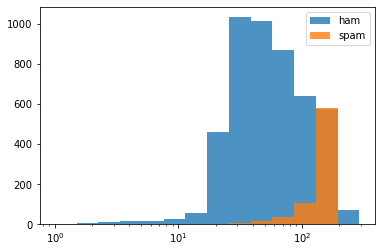

In [44]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['type'] == 'ham']['length'] ,  bins = bins , alpha = 0.8)
plt.hist(data[data['type'] == 'spam']['length'] ,  bins = bins , alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

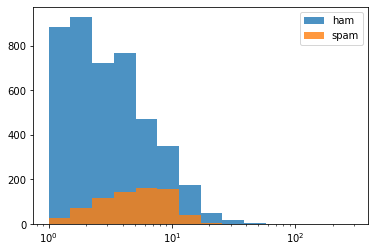

In [43]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['type'] == 'ham']['punc'] ,  bins = bins , alpha = 0.8)
plt.hist(data[data['type'] == 'spam']['punc'] ,  bins = bins , alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

#### Modeling using length and punctuation count in the text

In [16]:
x = data[['length','punc']]
y = data['type']

In [17]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_Train ,Y_Train)

LogisticRegression()

In [26]:
from sklearn.metrics import confusion_matrix ,  classification_report , accuracy_score

In [68]:
y_pred = lr.predict(X_Test)
confusion_matrix(Y_Test  , y_pred)

array([[931,  35],
       [145,   4]], dtype=int64)

In [70]:
print(classification_report(Y_Test  , y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.96      0.91       966
        spam       0.10      0.03      0.04       149

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.48      1115
weighted avg       0.76      0.84      0.80      1115



In [72]:
accuracy_score(Y_Test  , y_pred) 

0.8385650224215246

#### Modeling using text

In [18]:
x = data['text']
y = data['type']
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer

In [21]:
cv = CountVectorizer(stop_words = 'english')
cv_train = cv.fit_transform(X_Train)

In [22]:
tfidf = TfidfTransformer()
tfidf_train = tfidf.fit_transform(cv_train)

#### Using LogistiicRegression Model

In [83]:
lr.fit(tfidf_train ,  Y_Train)

LogisticRegression()

In [23]:
cv_test = cv.transform(X_Test)
tfidf_test = tfidf.transform(cv_test)

In [88]:
y_pred = lr.predict(tfidf_test)
confusion_matrix(Y_Test  , y_pred)

array([[966,   0],
       [ 34, 115]], dtype=int64)

In [89]:
print(classification_report(Y_Test  , y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#### Modeling using SVC

In [13]:
from sklearn.svm import SVC

In [24]:
svc = SVC()
svc.fit(tfidf_train , Y_Train)

SVC()

In [27]:
y_pred = svc.predict(tfidf_test)
confusion_matrix(Y_Test  , y_pred)

array([[966,   0],
       [ 17, 132]], dtype=int64)

In [28]:
print(classification_report(Y_Test  , y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



#### Modeling using KNN

In [46]:
 from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors =  5)
knn.fit(tfidf_train , Y_Train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(tfidf_test)
confusion_matrix(Y_Test  , y_pred)

array([[966,   0],
       [ 97,  52]], dtype=int64)

In [49]:
print(classification_report(Y_Test  , y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       966
        spam       1.00      0.35      0.52       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



#### Modeling using Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
mnb = MultinomialNB()

In [54]:
mnb.fit(tfidf_train , Y_Train)
y_pred = mnb.predict(tfidf_test)
confusion_matrix(Y_Test  , y_pred)

array([[966,   0],
       [ 24, 125]], dtype=int64)

In [55]:
print(classification_report(Y_Test  , y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

